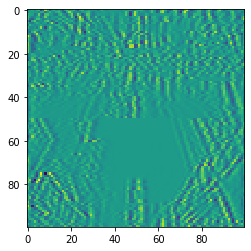

In [49]:
import torch
import pickle 
#텍스트 이외의 자료형을 파일로 저장할 때 사용하는 모듈  
import matplotlib.pyplot as plt 
# 파이썬에서 데이타를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지

broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )

plt.imshow(broken_image.view(100,100)) 

In [50]:
def weird_function(x, n_iter = 5):
    h = x
    filt = torch.tensor([-1./3,1./3,-1/3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor,h[:-1]),0)
        h_r = torch.cat((h[1:],zero_tensor),0)
        h = filt[0]*h +filt[2]*h_l +filt[1]*h_r
        if i % 2 == 0 :
            h = torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
    return h
    
# 해당 함수는 주어지는 것으로 현재 단계에서 이해할 필요 x 

In [51]:
def distance_loss(hypothesis,broken_image):
    return torch.dist(hypothesis,broken_image)
# 무작위 텐서(random_tensor)를 weird_function()에 입력해 얻은 hypothesis 텐서와 
#오염된 이미지 (broken_image) 사이의 오차를 구하는 함수

In [52]:
random_tensor = torch.randn(10000, dtype = torch.float)
# [100,100] 모양의 무작위 텐서 생성

In [53]:
lr = 0.8
#학습을 얼마나 급하게 진행하는지를 정하는 매개변수 학습률

In [54]:
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    #오차 함수를 random_tensor 로 미분
    hypothesis = weird_function(random_tensor)
    # random_tensor 를 weird_function()에 입력해서 hypothesis 값을 얻음
    loss = distance_loss(hypothesis, broken_image)
    # distance_loss()에 hypothesis 와 broken_image를 입력해서 오차를 계산
    loss.backward()
    # backward() 함수를 호출해 오차를 random_tensor로 미분
    with torch.no_grad(): 
        # 파이토치는 신경망 모델의 그래프를 생성하는데 이번 예제에서는 
        # 직접 경사하강법을 구현하기 때문에 torch.no_grad()를 활용해서
        # 파이토치의 자동 기울기 계산을 비활성화 
        random_tensor = random_tensor-lr *random_tensor.grad
        # random_tensor.grad에는 loss를 random_tensor로 미분한 값이 최값이 되는 곳의 방향
        # 이 방향의 반대쪽으로 random_tensor를 lr 만큼 이동시킨다.
    if i%1000 ==  0:
        print('Loss at {} = {}'.format(i,loss.item()))
    # 1000 번 동안 오차 출력 

Loss at 0 = 12.530447006225586
Loss at 1000 = 1.1487935781478882
Loss at 2000 = 0.5392944812774658
Loss at 3000 = 0.37288835644721985
Loss at 4000 = 0.2951332628726959
Loss at 5000 = 0.24721910059452057
Loss at 6000 = 0.21263812482357025
Loss at 7000 = 0.18509206175804138
Loss at 8000 = 0.16170015931129456
Loss at 9000 = 0.14096510410308838
Loss at 10000 = 0.12203216552734375
Loss at 11000 = 0.10437863320112228
Loss at 12000 = 0.08766631782054901
Loss at 13000 = 0.07166730612516403
Loss at 14000 = 0.05622291937470436
Loss at 15000 = 0.04122238978743553
Loss at 16000 = 0.026589099317789078
Loss at 17000 = 0.021158501505851746
Loss at 18000 = 0.021166013553738594
Loss at 19000 = 0.02116740122437477


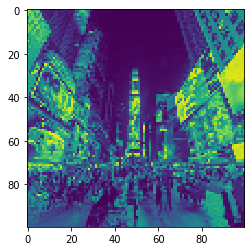

In [55]:
plt.imshow(random_tensor.view(100,100).data)
#마지막으로 반복문이 다 돌면 제대로 복원되었는지 확인 